In [3]:
#To re-create Figure 9 in 3-D CMZ Paper II
# 
#  New notebook to make plot comparing SFRs and PDF fit alphas
# was previously "hard-coded" in at the end of: NEW_plot_dendro_PDFs.ipynb
# updated SFRs March 2024 and didn't want to bother updating the rest of the python code!
# updated June 2024 to use megatable (and therefore be more adaptable!!!)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
pathfigs = '/Users/cab16109/Dropbox/Work/higal_cmz/PAPER/ALL_figures/'
megatable = '/Users/cab16109/Dropbox/Work/higal_cmz/PAPER/FINAL_DATA_files_for_release/FINAL_tables/MEGATABLE/MEGATABLE.fits'
#megatable = '/Users/cab16109/Dropbox/MEGATABLE/megatable.fits' # live one not working for now, try again later!

In [6]:
from astropy.table import Table
t = Table.read(megatable)
t.columns

<TableColumns names=('Name','ID','Paper III ID','CMZoom region','Area','l','b','Median N_H2','Peak N_H2','Mass','Radius','Density','Median T_dust','Peak T_dust','HNCO mom0','HCN mom0','HC3N mom0','HNCO mom1','HCN mom1','HC3N mom1','HNCO FWHM','HCN FWHM','HC3N FWHM','Total Luminosity (Cool)','Average Luminosity (Cool)','Total Luminosity (Warm)','Average Luminosity (Warm)','Total IR Luminosity','Total IR SFR','SFR (free fall)','SFR CMZoom (Herschel temp)','Error SFR CMZoom (Herschel temp)','SFR CMZoom (50 K)','Error SFR CMZoom (50 K)','Best SFR estimate','x_min (N_H_2)','PL slope','PL error','SFR method','Colloquial name / description')>

In [7]:
# set quantity to first row
num_rows = len(t[0][:])
for i in range(num_rows):
    t[i].quantity = t[i][0]

#then remove that row
t.remove_row(0)

In [8]:
## need a SFR error column! then can add back in the error stuff, but for now, leave out.
plslope = t.columns['PL slope']
plerr = t.columns['PL error']
sfr = t.columns['Best SFR estimate']

In [9]:
## Having issues with the '--' in the tables which have different numbers of spaces i think?
# this is a really ugly fix, but well, I am ready to move on, so so it goes.

noval = plslope[0]
noval2 = plerr[23] # it is just a '--' but wasn't recognizing the string when entered by hand so idk probably had spaces or something
plslope[plslope==noval] = np.nan
plslope[plslope==noval2] = np.nan
plslope = np.array(plslope, dtype=np.double)

plerr[plerr==noval] = np.nan
plerr[plerr==noval2] = np.nan
plerr = np.array(plerr, dtype=np.double)

noval3 = sfr[11]
sfr[sfr==noval3] = np.nan
sfr = np.array(sfr, dtype=np.double)

idx = np.isfinite(plslope)

#identify one position where we have a pl fit but no sfr, ID 29, 1.1deg complex
w29 = np.where(t.columns['ID']==29)
print(w29) # 13

idx[13] = False


(array([13]),)


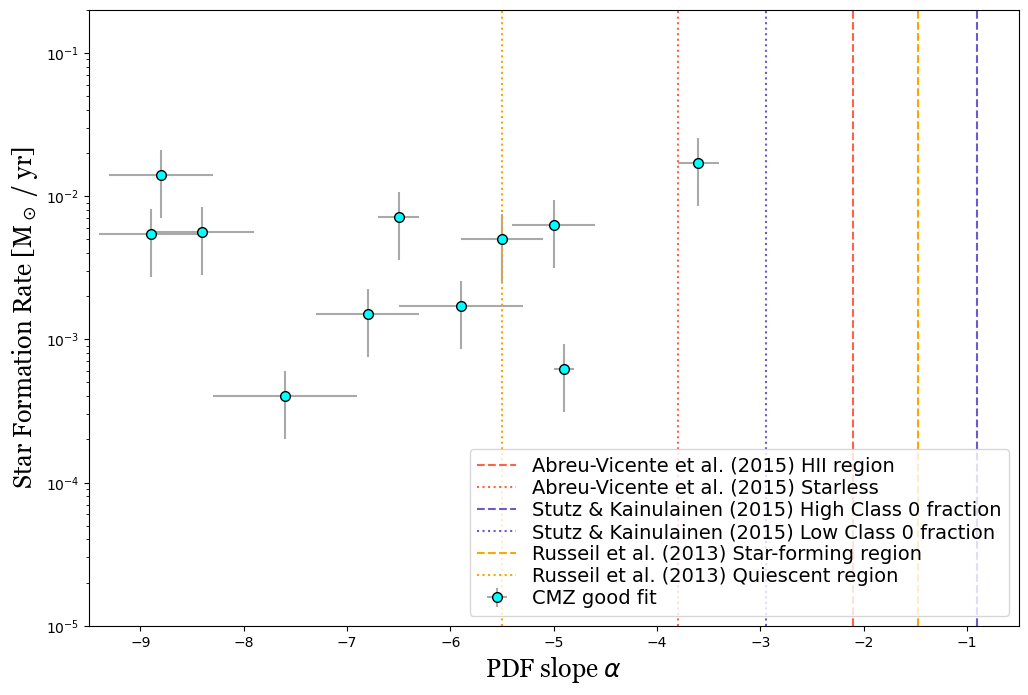

In [10]:
plt.figure(figsize=(12,8))
#plt.plot(alphas_good,SFRs_good,ls='',marker='o',color='cyan',markersize='7',markeredgecolor='k', label='CMZ good')
#plt.plot(alphas_maybe,SFRs_maybe,ls='',marker='*',color='cyan',markersize='7',markeredgecolor='k', label='CMZ moderate')

sfrerr = (sfr[idx])*0.5

plt.errorbar(plslope[idx], sfr[idx], yerr=sfr[idx]*0.5, xerr=plerr[idx], ls='',marker='o',color='cyan',
             ecolor='darkgray',markersize='7',markeredgecolor='k', label='CMZ good fit')

#plt.errorbar(a, b, ls='',marker='o',color='cyan', ecolor='darkgray', markersize='7',markeredgecolor='k')
#
#lt.errorbar(a, b, yerr=c, xerr=d, ls='',marker='o',color='cyan', ecolor='darkgray', markersize='7',markeredgecolor='k')

#plt.plot(plslope[idx], sfr[idx], ls='',marker='o',color='cyan', markersize='7')

ymin = 1e-5
ymax = 2e-1
plt.ylim(ymin, ymax)
plt.yscale('log')
plt.xlim(-9.5, -0.5)
plt.xlabel(r'PDF slope $\alpha$', **{'fontname':'Georgia'},fontsize=18)
plt.ylabel(r'Star Formation Rate [M$_\odot$ / yr]', **{'fontname':'Georgia'},fontsize=18)

#Abreu-Vicente 2015 averages
plt.plot([-2.1,-2.1], [ymin, ymax], ls='--', color='tomato', label='Abreu-Vicente et al. (2015) HII region')
plt.plot([-3.8,-3.8], [ymin, ymax], ls=':', color='tomato', label='Abreu-Vicente et al. (2015) Starless')

#Stutz & Kainulainen 2015 averages
plt.plot([-0.9,-0.9], [ymin, ymax], ls='--', color='slateblue', label='Stutz & Kainulainen (2015) High Class 0 fraction')
plt.plot([-2.95, -2.95], [ymin, ymax], ls=':', color='slateblue', label='Stutz & Kainulainen (2015) Low Class 0 fraction')

#Russeil et al. 2013 averages
plt.plot([-1.48, -1.48], [ymin, ymax], ls='--', color='orange', label='Russeil et al. (2013) Star-forming region')
plt.plot([-5.5, -5.5], [ymin, ymax], ls=':', color='orange', label='Russeil et al. (2013) Quiescent region')

plt.legend(loc='lower right', numpoints=1, ncol=1, fontsize=14, labelspacing=.16)

outfile = pathfigs+'SFR_vs_PDFslope_v2.pdf'
plt.savefig(outfile, format='pdf', dpi=300)#, bbox_inches='tight')
plt.show()

In [11]:
wlow = np.where(plslope < -8.0)
print(t.columns['ID'][wlow])
#39: 1.1deg west, SFR: free-fall
#21: C-shaped cloud, SFR: free-fall
#30: SgrB2 extended, SFR: CMZoom

 ID
---
 39
 21
 30


In [14]:
print(sfr[np.where(t.columns['ID']==0)])

[0.0027]
